Esta tarefa consiste em:

1) Assistir ao vídeo https://www.youtube.com/watch?v=waNQ-7ckw0I

2) Desenvolver as máscaras de derivada discutidas no vídeo

3) Implementar o detector de bordas discutido no vídeo

3.1) Ler uma imagem em escala de cinzas (ou ler imagem colorida e transformar para escala de cinzas)

3.2) Ampliar a imagem para que ela tenha dois pixels a mais na direção horizontal (uma coluna de pixels à esquerda da imagem e uma coluna de pixels à direita da imagem) e dois pixels a mais na direção vertical (uma linha de pixels no topo da imagem e uma linha na base da imagem). Esses pixels adicionais terão valor de intensidade iguais a zero.

3.3) usar uma máscara de derivada (abordagem central) e aplicá-la a cada pixel da imagem ampliada que não seja um pixel de borda. O resultado da aplicação da máscara sobre um pixel é copiado no pixel correspondente de uma imagem nova.

3.4) Exibir a imagem original e a imagem nova.

Inicia em 19/03/2020 às 00h00 e finaliza em 02/04/2020 às 23h59

# -------------------------------------------OBJETIVO--------------------------------------

In [4]:
import numpy as np
from PIL import Image


In [23]:
img = Image.open('blocks.jpg').convert('L')

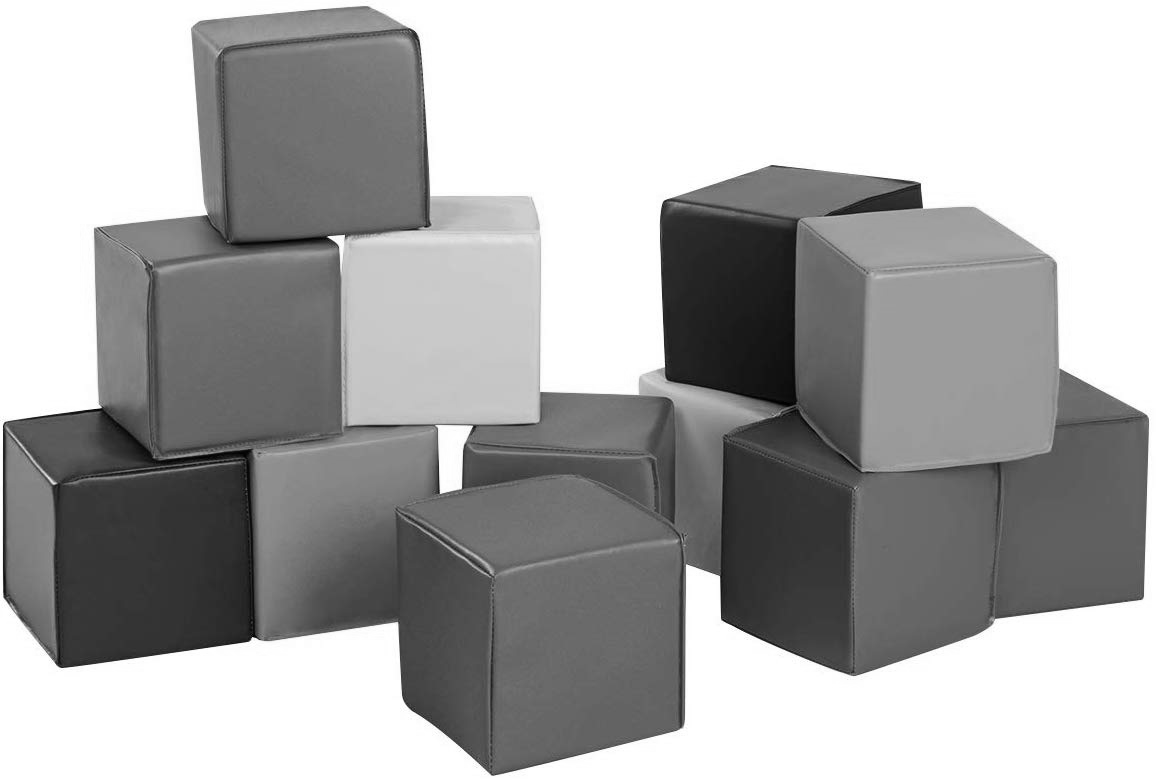

In [24]:
img


In [25]:
from PIL import ImageFilter

im1 = img.filter(ImageFilter.CONTOUR)

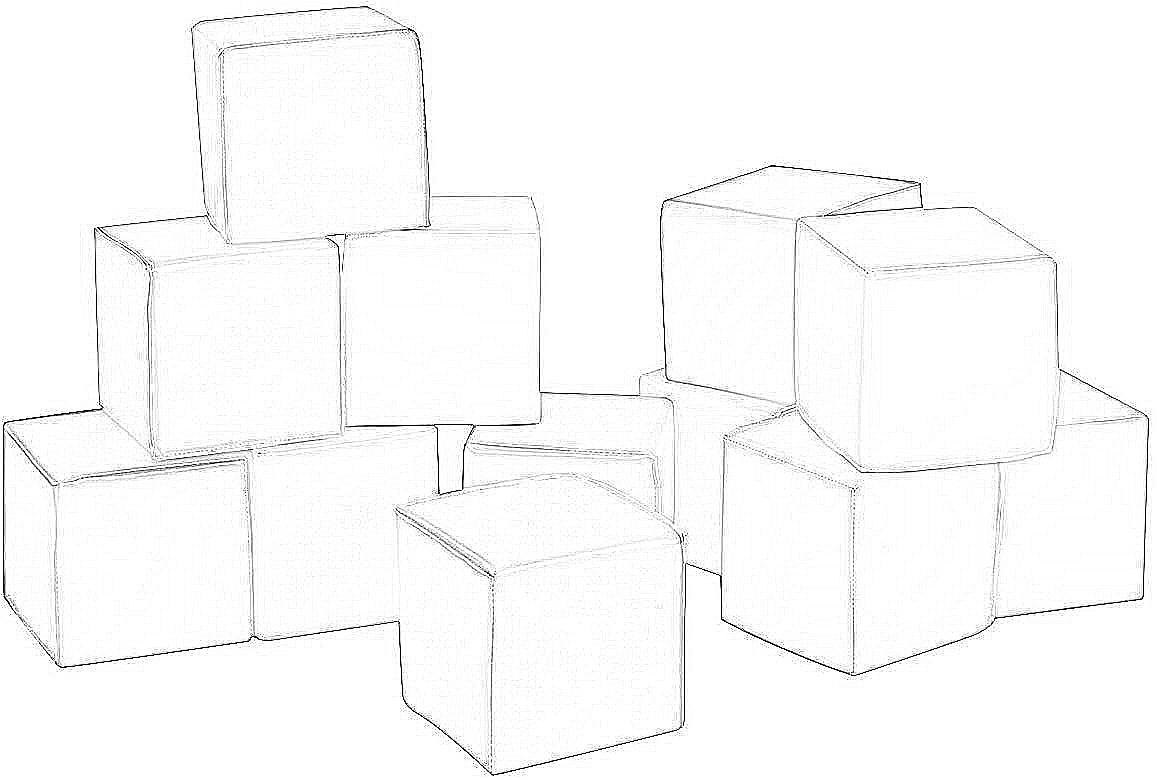

In [26]:
im1

# ----------------------------FIM DO OBJETIVO---------------------------------

# Lendo uma imagem colorida e transformando para escala de cinzas

In [439]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage import io
from skimage import color


In [550]:
img = io.imread('blocks.jpg')
img = img[...,:3]
img.shape

(780, 1157, 3)

In [552]:
#Y' = 0.2989 R + 0.5870 G + 0.1140 B 
def rgb_to_gray(rgb):
    return np.dot(rgb[...], [0.2989, 0.5870, 0.1140])


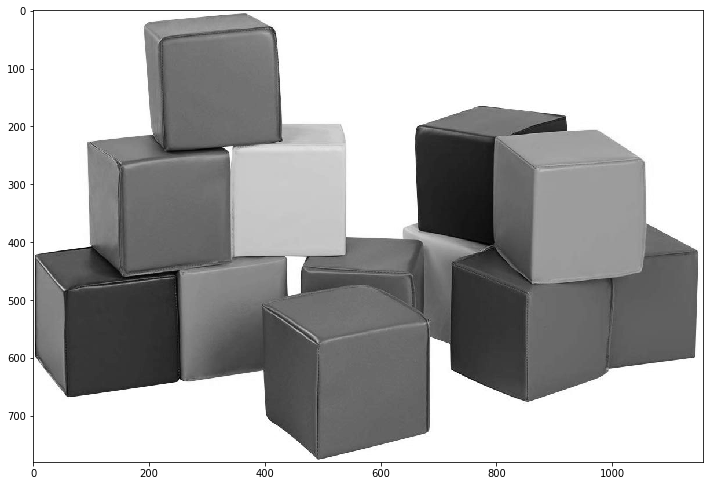

In [553]:
img = rgb_to_gray(img)
plt.figure(figsize=(12,12))
plt.imshow(img, cmap='gray')

# Ampliando a imagem para que ela tenha dois pixels a mais na direção horizontal (uma coluna de pixels à esquerda da imagem e uma coluna de pixels à direita da imagem) e dois pixels a mais na direção vertical (uma linha de pixels no topo da imagem e uma linha na base da imagem).

In [554]:
img.shape

(780, 1157)

In [555]:
sum(img[0])

294898.376100006

In [556]:
sum(img[img.shape[0]-1])

294978.6037000059

In [557]:
sum(img[:,img.shape[1]-1])

198880.1100000017

In [558]:
sum(img[:,0])

198577.46300000144

In [559]:
new_img = np.zeros((img.shape[0]+2,img.shape[1]+2))

In [560]:
new_img.shape

(782, 1159)

In [561]:
new_img

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [562]:
new_img[1:img.shape[0]+1, 1:img.shape[1]+1] = img 

In [563]:
sum(new_img[0])

0.0

In [564]:
sum(new_img[new_img.shape[0]-1])

0.0

In [565]:
sum(new_img[:,[new_img.shape[1]-1]])

array([0.])

In [566]:
sum(new_img[:,0])

0.0

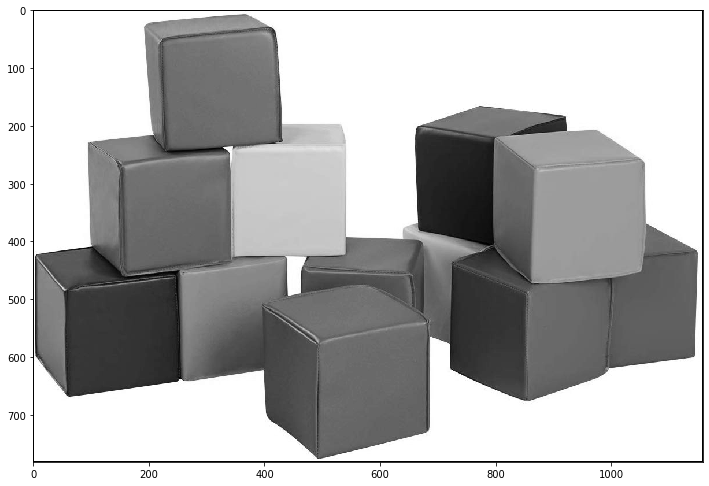

In [567]:
plt.figure(figsize=(12,12))
plt.imshow(new_img, cmap='gray')

#  Desenvolvendo as máscaras de derivada

In [568]:
box_blur = np.array([[0,1,0],[1,0,1],[0,1,0]])
gaussian_blur = np.array([[1,2,1],[2,4,2],[1,2,1]])
sharpen = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
embossing = np.array([[1,1,0],[1,0,-1],[0,-1,-1]])

In [569]:
vertical_kernel = np.array([[0,0,0],[-1,0,1],[0,0,0]])
horizontal_kernel = np.array([[0,1,0],[0,0,0],[0,-1,0]])
hv_kernel = np.array([[0,1,0],[-1,0,1],[0,-1,0]])

# Usando uma máscara(kernel) de derivada (abordagem central) e aplicando a cada pixel da imagem ampliada que não seja um pixel de borda. O resultado da aplicação da máscara sobre um pixel é copiado no pixel correspondente de uma imagem nova.

In [577]:
def convolution2d(image, kernel):
    #Kernel tem que ser quadrado.
    
    m, n = kernel.shape
    x, y = image.shape
    
    y = y - m + 1
    x = x - m + 1
    new_image = image.copy()
    for i in range(x):
        for j in range(y):
            new_image[i][j] = np.sum(np.multiply(image[i:i+m, j:j+n],kernel))
            
    return new_image

In [578]:
xaba=convolution2d(new_img,sharpen)

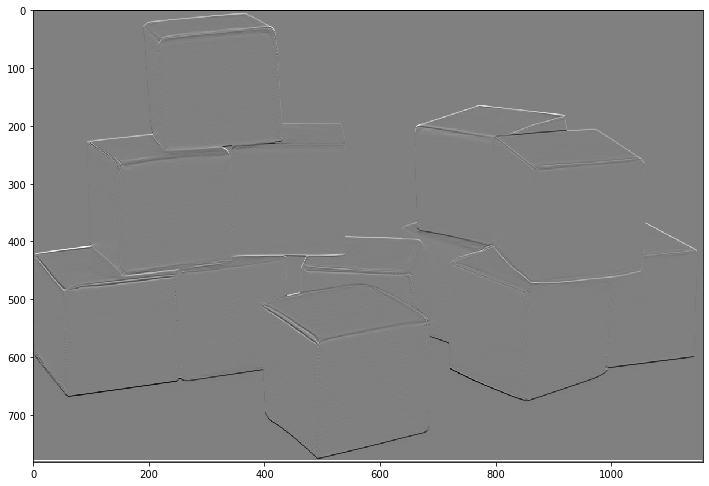

In [584]:
plt.figure(figsize=(12,12))
plt.imshow(xaba, cmap='gray')

In [572]:
xaba=convolution2d(new_img,embossing)

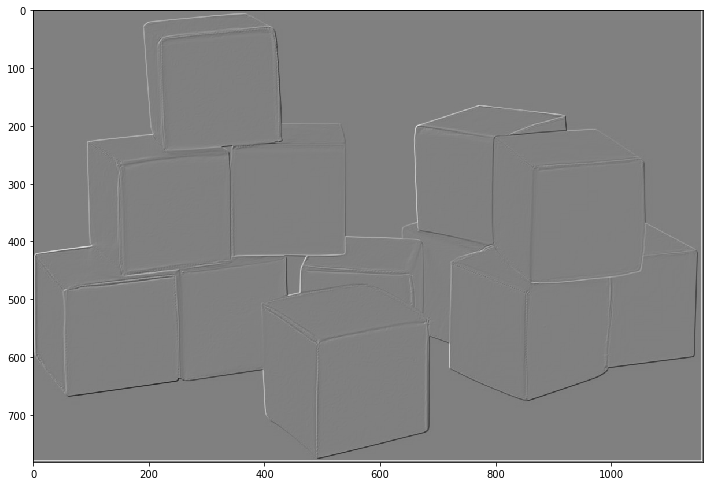

In [573]:
plt.figure(figsize=(12,12))
plt.imshow(xaba, cmap='gray')

In [574]:
xaba=convolution2d(new_img,hv_kernel)

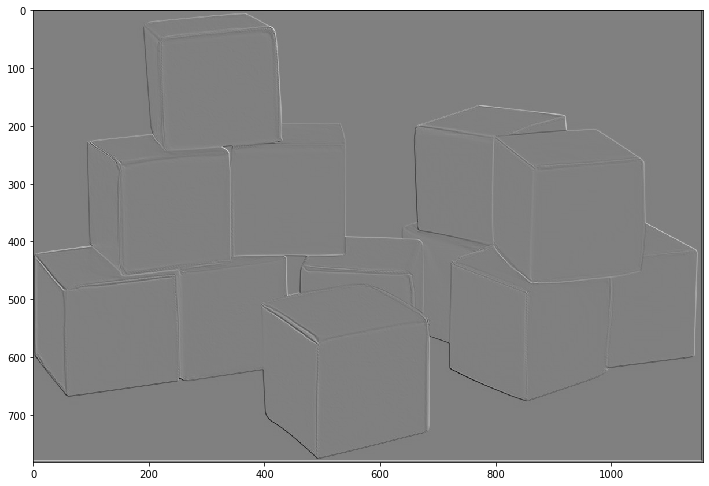

In [575]:
plt.figure(figsize=(12,12))
plt.imshow(xaba, cmap='gray')

In [579]:
xaba=convolution2d(new_img,vertical_kernel)

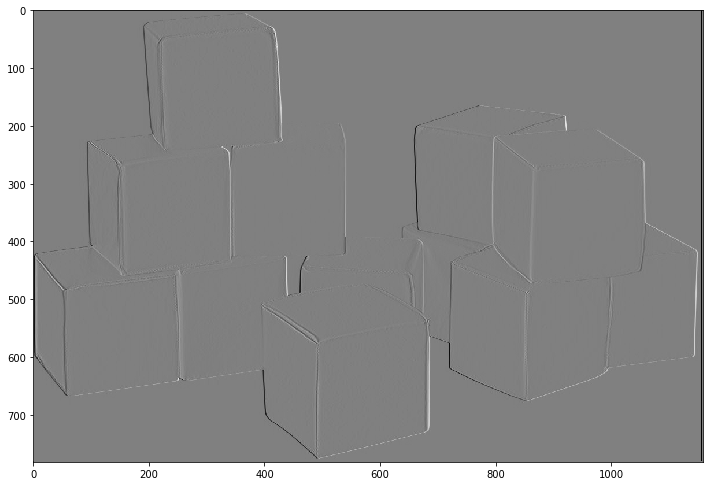

In [580]:
plt.figure(figsize=(12,12))
plt.imshow(xaba, cmap='gray')

In [581]:
xaba=convolution2d(new_img,horizontal_kernel)

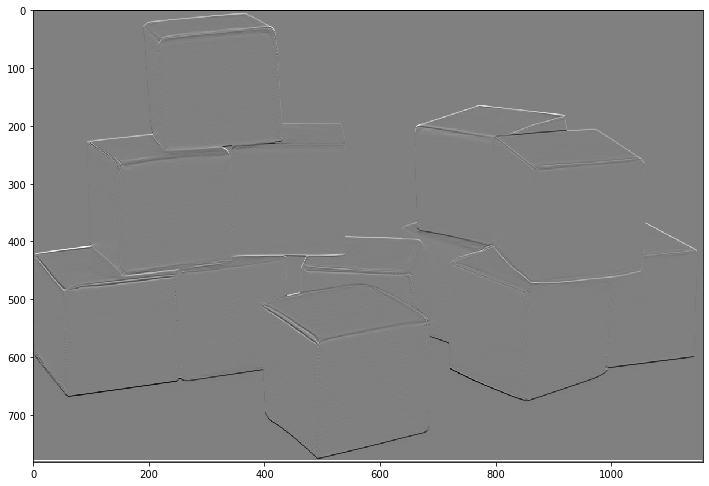

In [582]:
plt.figure(figsize=(12,12))
plt.imshow(xaba, cmap='gray')